# Q4 Shoulders of Giants (15 points)
As we have already seen, deep networks can sometimes be hard to optimize. Often times they heavily overfit on small training sets. Many approaches have been proposed to counter this, eg, [Krahenbuhl et al. (ICLR’16)](http://arxiv.org/pdf/1511.06856.pdf), self-supervised learning, etc. However, the most effective approach remains pre-training the network on large, well-labeled supervised datasets such as ImageNet. 

While training on the full ImageNet data is beyond the scope of this assignment, people have already trained many popular/standard models and released them online. In this task, we will initialize a ResNet-18 model with pre-trained ImageNet weights (from `torchvision`), and finetune the network for PASCAL classification.

## 4.1 Load Pre-trained Model (7 pts)\
Load the pre-trained weights up to the second last layer, and initialize last weights and biases from scratch.

The model loading mechanism is based on names of the weights. It is easy to load pretrained models from `torchvision.models`, even when your model uses different names for weights. Please briefly explain how to load the weights correctly if the names do not match ([hint](https://discuss.pytorch.org/t/loading-weights-from-pretrained-model-with-different-module-names/11841)).

**YOUR ANSWER HERE**

The state_dict of each model is ordered, so we can iterate through a model's state_dict() to retrieve each parameter's weights regardless of the parameter's name.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import matplotlib.pyplot as plt
%matplotlib inline

import trainer
from utils import ARGS
from simple_cnn import SimpleCNN
from voc_dataset import VOCDataset


# Pre-trained weights up to second-to-last layer
# final layers should be initialized from scratcH!
class PretrainedResNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.resnet = models.resnet18(pretrained=True)
        for param in self.resnet.parameters():
            param.requires_grad = False
        num_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_features, 20)
        
    def forward(self, x):
        return self.resnet(x)

Use similar hyperparameter setup as in the scratch case. Show the learning curves (training loss, testing MAP) for 10 epochs. Please evaluate your model to calculate the MAP on the testing dataset every 100 iterations.

**REMEMBER TO SAVE MODEL AT END OF TRAINING**

In [2]:
args = ARGS(epochs=10, batch_size=32, lr=0.0001, use_cuda=True, gamma=1, test_batch_size=16, save_at_end=True)
model = PretrainedResNet()
optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=args.gamma)
test_ap, test_map = trainer.train(args, model, optimizer, scheduler, model_name='models/q4')
print('test map:', test_map)

Train Epoch: 0 [0 (0%)]	Loss: 0.801970
test map (validation): 0.06491375747891823
Train Epoch: 0 [100 (64%)]	Loss: 0.261276
test map (validation): 0.08590733045291649
Train Epoch: 1 [200 (27%)]	Loss: 0.228357
test map (validation): 0.13864523553546332
Train Epoch: 1 [300 (91%)]	Loss: 0.237832
test map (validation): 0.22195116811878912
Train Epoch: 2 [400 (55%)]	Loss: 0.221749
test map (validation): 0.30102819926136315
Train Epoch: 3 [500 (18%)]	Loss: 0.164250
test map (validation): 0.38163538594364643
Train Epoch: 3 [600 (82%)]	Loss: 0.201074
test map (validation): 0.45942833039946407
Train Epoch: 4 [700 (46%)]	Loss: 0.183013
test map (validation): 0.5179659630839906
Train Epoch: 5 [800 (10%)]	Loss: 0.175086
test map (validation): 0.5678227476043072
Train Epoch: 5 [900 (73%)]	Loss: 0.159335
test map (validation): 0.6132752122711502
Train Epoch: 6 [1000 (37%)]	Loss: 0.173144
test map (validation): 0.630692153070752
Train Epoch: 7 [1100 (1%)]	Loss: 0.161440
test map (validation): 0.65440

**YOUR TB SCREENSHOTS HERE**

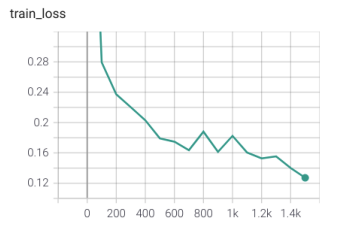

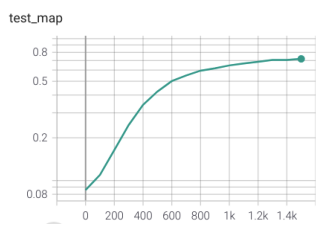

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('q4_1.png')
plt.imshow(img)
plt.axis("off")
plt.show()
img = mpimg.imread('q4_2.png')
plt.imshow(img)
plt.axis("off")
plt.show()